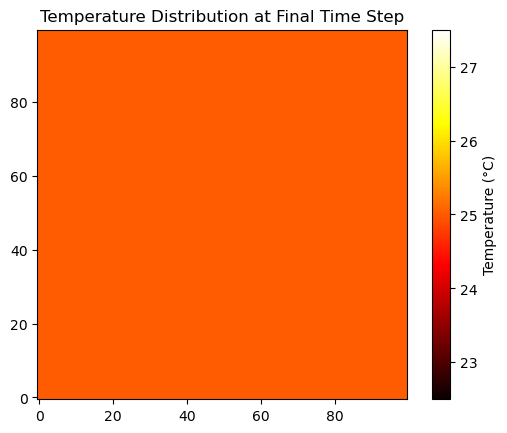

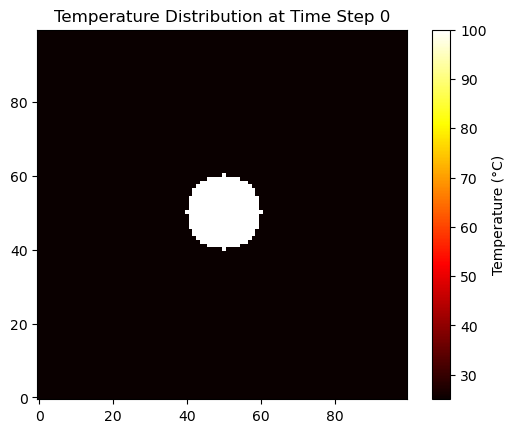

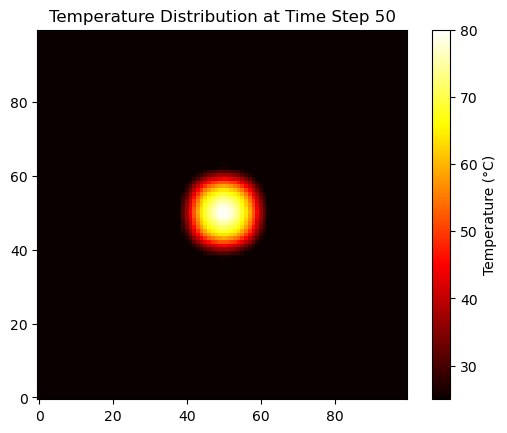

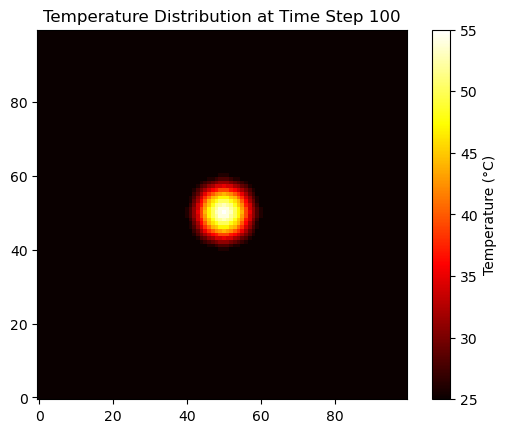

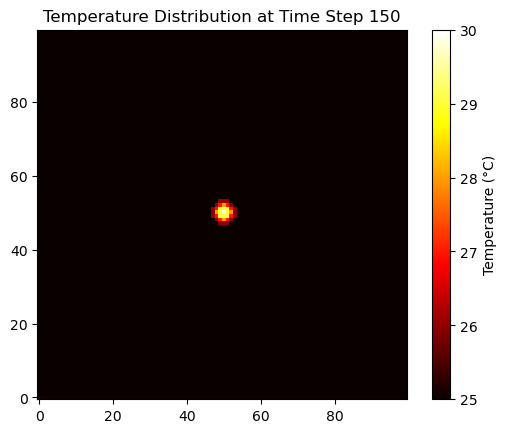

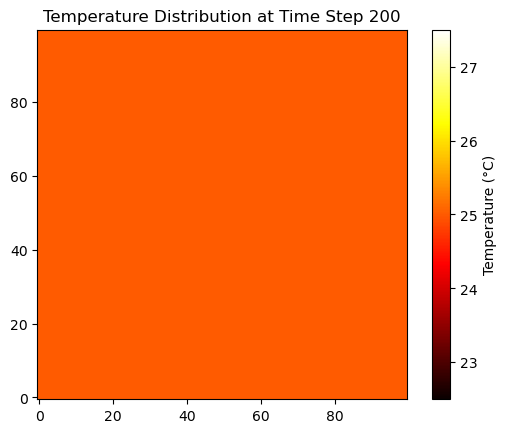

Equilibrium temperature around the area: 25.00 °C


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
width, height = 100, 100  # Grid dimensions
initial_temp = 100  # Initial temperature in the high temperature circular area
room_temp = 25  # Room temperature of the surrounding liquid
thermal_diffusivity = 0.1  # Thermal diffusivity of the liquid (in arbitrary units)
time_step = 0.1  # Time step for simulation
num_steps = 200  # Number of time steps to simulate

# Create a 2D array representing the temperature grid
temperature = np.full((height, width), room_temp)  # Initialize the grid with room temperature

# Define the center and radius of the high temperature circular area
center_x, center_y = width // 2, height // 2
radius = 10  # Radius of the circular area

# Apply the initial condition: set the high temperature in the circular area
y, x = np.ogrid[:height, :width]
distance_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2)
mask = distance_from_center <= radius
temperature[mask] = initial_temp

# Define function to update temperature using heat diffusion equation
def update_temperature(temp, alpha):
    # Create a copy of the temperature grid to store the updated values
    new_temp = temp.copy()
    
    # Apply the finite difference method
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Calculate the change in temperature using the heat diffusion equation
            delta_temp = alpha * (
                temp[i + 1, j] + temp[i - 1, j] +
                temp[i, j + 1] + temp[i, j - 1] -
                4 * temp[i, j]
            )
            # Update the temperature at the current point
            new_temp[i, j] += delta_temp
            
    return new_temp

# List to store the temperature grid at different time steps
temperature_grids = [temperature.copy()]

# Simulate the heat diffusion process
for step in range(num_steps):
    # Update the temperature grid
    temperature = update_temperature(temperature, thermal_diffusivity)
    
    # Store the temperature grid
    temperature_grids.append(temperature.copy())

# Plot the temperature distribution at the final time step
plt.imshow(temperature, cmap='hot', origin='lower')
plt.title('Temperature Distribution at Final Time Step')
plt.colorbar(label='Temperature (°C)')
plt.show()

# Plot temperature distribution at various time steps
time_steps_to_plot = [0, 50, 100, 150, 200]
for time_step in time_steps_to_plot:
    plt.figure()
    plt.imshow(temperature_grids[time_step], cmap='hot', origin='lower')
    plt.title(f'Temperature Distribution at Time Step {time_step}')
    plt.colorbar(label='Temperature (°C)')
    plt.show()

# Calculate equilibrium temperature around the area
equilibrium_temperature = temperature.mean()
print(f'Equilibrium temperature around the area: {equilibrium_temperature:.2f} °C')


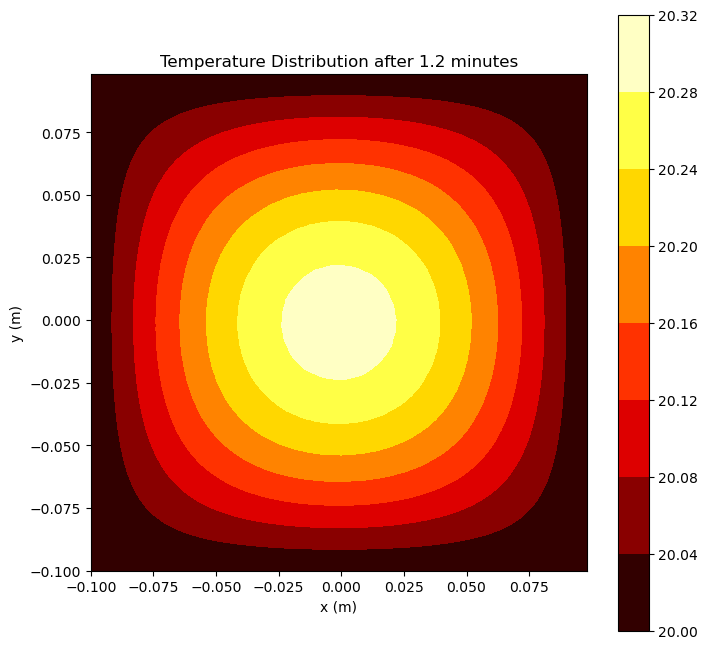

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 1e-4  # thermal diffusivity of the liquid (in square meters per second)
R = 0.05  # radius of the circular heated area (in meters)
high_temp = 35  # high temperature in the circular area (in degrees Celsius)
room_temp = 20  # room temperature of the liquid (in degrees Celsius)
dt = 0.01  # time step (in seconds)
dx = 0.002  # spatial step (in meters)
dy = dx  # spatial step (in meters)
total_time = 70 # total simulation time (in seconds)

# Create a grid
x = np.arange(-0.1, 0.1, dx)
y = np.arange(-0.1, 0.1, dy)
X, Y = np.meshgrid(x, y)
T = np.full(X.shape, room_temp, dtype=np.float64)  # Initial temperature distribution

# Set the initial high temperature in the circular area
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if (X[i, j]**2 + Y[i, j]**2) <= R**2:
            T[i, j] = high_temp

# Function to update the temperature using the heat equation
def update_temperature(T, alpha, dt, dx, dy):
    T_new = np.copy(T)
    for i in range(1, T.shape[0] - 1):
        for j in range(1, T.shape[1] - 1):
            # Calculate the Laplacian in 2D
            laplacian = (
                (T[i + 1, j] - 2 * T[i, j] + T[i - 1, j]) / dx**2 +
                (T[i, j + 1] - 2 * T[i, j] + T[i, j - 1]) / dy**2
            )
            # Update the temperature
            T_new[i, j] += alpha * laplacian * dt
    return T_new

# Time evolution of the temperature
for t in np.arange(0, total_time, dt):
    T = update_temperature(T, alpha, dt, dx, dy)

# Plotting the temperature distribution after the simulation time
plt.figure(figsize=(8, 8))
contour = plt.contourf(X, Y, T, cmap='hot')
plt.title(f'Temperature Distribution after {total_time / 60:.1f} minutes')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar(contour)

# Set the aspect ratio of the plot to be equal, ensuring the plot is square
plt.gca().set_aspect('equal')

plt.show()

# Equilibrium temperature around the circular area can be observed from the last plot.


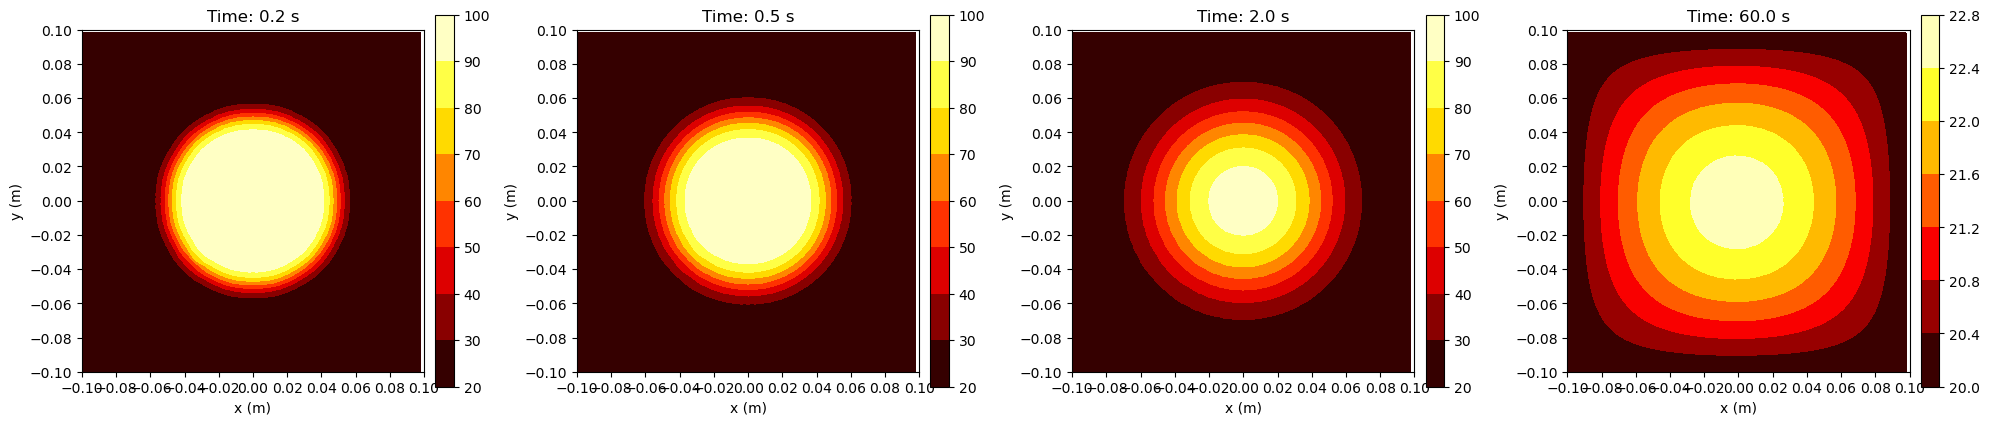

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 1e-4  # thermal diffusivity of the liquid (in square meters per second)
R = 0.05  # radius of the circular heated area (in meters)
high_temp = 100  # high temperature in the circular area (in degrees Celsius)
room_temp = 20  # room temperature of the liquid (in degrees Celsius)
dt = 0.01  # time step (in seconds)
dx = 0.002  # spatial step (in meters)
dy = dx  # spatial step (in meters)
total_time = 70  # total simulation time (in seconds)

# Create a grid
x = np.arange(-0.1, 0.1, dx)
y = np.arange(-0.1, 0.1, dy)
X, Y = np.meshgrid(x, y)
T = np.full(X.shape, room_temp, dtype=np.float64)  # Initial temperature distribution

# Set the initial high temperature in the circular area
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if (X[i, j]**2 + Y[i, j]**2) <= R**2:
            T[i, j] = high_temp

# Function to update the temperature using the heat equation
def update_temperature(T, alpha, dt, dx, dy):
    T_new = np.copy(T)
    for i in range(1, T.shape[0] - 1):
        for j in range(1, T.shape[1] - 1):
            # Calculate the Laplacian in 2D
            laplacian = (
                (T[i + 1, j] - 2 * T[i, j] + T[i - 1, j]) / dx**2 +
                (T[i, j + 1] - 2 * T[i, j] + T[i, j - 1]) / dy**2
            )
            # Update the temperature
            T_new[i, j] += alpha * laplacian * dt
    return T_new

# Time evolution of the temperature
times = np.arange(0, total_time, dt)
temperature_plots = []

for t in times:
    T = update_temperature(T, alpha, dt, dx, dy)
    temperature_plots.append((t, T))

# Plotting the temperature distribution at different time intervals
time_intervals = [0.2, 0.5, 2, 60]  # Time intervals at which to plot the temperature
# Increase the figsize to make the heatmap bigger
fig, axes = plt.subplots(1, len(time_intervals), figsize=(20, 5))

# Define the ticks to be consistent across x and y axes
ticks = np.arange(-0.1, 0.11, 0.02)

for idx, interval in enumerate(time_intervals):
    t_index = int(interval / dt)
    ax = axes[idx]
    contour = ax.contourf(X, Y, temperature_plots[t_index][1], cmap='hot')
    ax.set_title(f'Time: {interval:.1f} s')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_aspect('equal')  # Set aspect ratio to be equal
    # Set the same tick marks on x and y axes
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    # Adjust colorbar: smaller size using fraction and pad parameters
    colorbar = fig.colorbar(contour, ax=ax, fraction=0.05, pad=0.03)

plt.tight_layout()
plt.show()

# Equilibrium temperature around the circular area can be observed from the last plot.


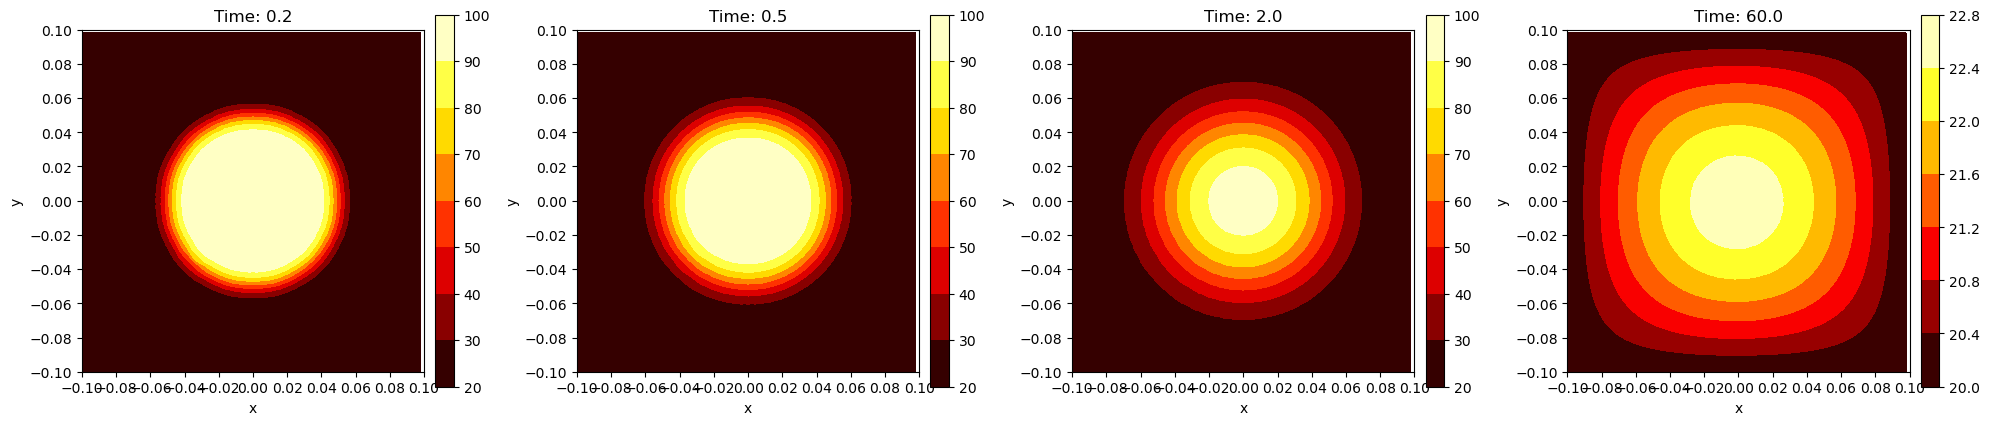

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 1e-4  # thermal diffusivity of the liquid
R = 0.05  # radius of the circular heated area
high_temp = 100  # high temperature in the circular area
room_temp = 20  # room temperature of the liquid
dt = 0.01  # time step
dx = 0.002  # spatial step
dy = dx  # spatial step
total_time = 70  # total simulation time

# Create a grid
x = np.arange(-0.1, 0.1, dx)
y = np.arange(-0.1, 0.1, dy)
X, Y = np.meshgrid(x, y)
T = np.full(X.shape, room_temp, dtype=np.float64)  # Initial temperature distribution

# Set the initial high temperature in the circular area
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if (X[i, j]**2 + Y[i, j]**2) <= R**2:
            T[i, j] = high_temp

# Function to update the temperature using the heat equation
def update_temperature(T, alpha, dt, dx, dy):
    T_new = np.copy(T)
    for i in range(1, T.shape[0] - 1):
        for j in range(1, T.shape[1] - 1):
            # Calculate the Laplacian in 2D
            laplacian = (
                (T[i + 1, j] - 2 * T[i, j] + T[i - 1, j]) / dx**2 +
                (T[i, j + 1] - 2 * T[i, j] + T[i, j - 1]) / dy**2
            )
            # Update the temperature
            T_new[i, j] += alpha * laplacian * dt
    return T_new

# Time evolution of the temperature
times = np.arange(0, total_time, dt)
temperature_plots = []

for t in times:
    T = update_temperature(T, alpha, dt, dx, dy)
    temperature_plots.append((t, T))

# Plotting the temperature distribution at different time intervals
time_intervals = [0.2, 0.5, 2, 60]  # Time intervals at which to plot the temperature
# Increase the figsize to make the heatmap bigger
fig, axes = plt.subplots(1, len(time_intervals), figsize=(20, 5))

# Define the ticks to be consistent across x and y axes
ticks = np.arange(-0.1, 0.11, 0.02)

for idx, interval in enumerate(time_intervals):
    t_index = int(interval / dt)
    ax = axes[idx]
    contour = ax.contourf(X, Y, temperature_plots[t_index][1], cmap='hot')
    ax.set_title(f'Time: {interval:.1f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')  # Set aspect ratio to be equal
    # Set the same tick marks on x and y axes
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    # Adjust colorbar: smaller size using fraction and pad parameters
    colorbar = fig.colorbar(contour, ax=ax, fraction=0.05, pad=0.03)

plt.tight_layout()
plt.show()

# Equilibrium temperature around the circular area can be observed from the last plot.


in cas eof LCs

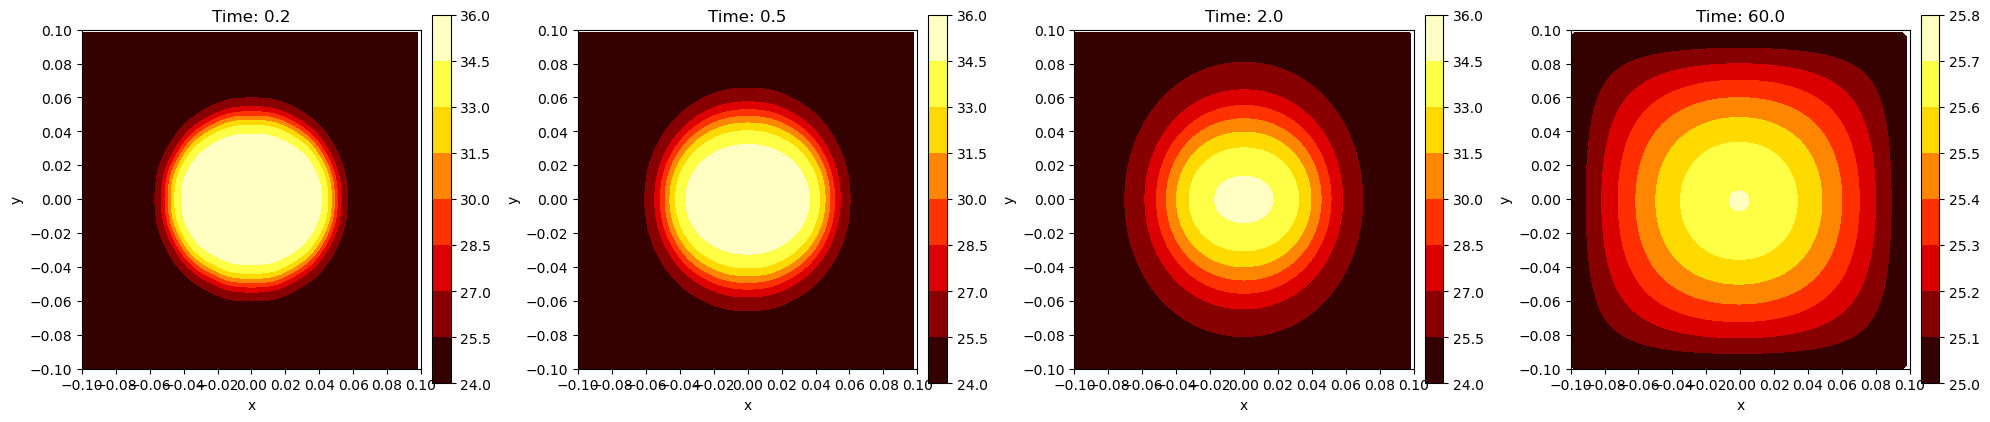

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha_parallel = 1e-4  # thermal diffusivity along the alignment direction of the LC
alpha_perpendicular = 5e-5  # thermal diffusivity perpendicular to the alignment direction of the LC
radius = 0.05  # radius of the isotropic bubble at the center
bubble_temp = 35  # temperature of the isotropic bubble at the center (in degrees Celsius)
lc_temp = 25  # temperature of the rest of the liquid crystal medium (in degrees Celsius)
dt = 0.01  # time step
dx = 0.002  # spatial step
dy = dx  # spatial step
total_time = 70  # total simulation time (in seconds)

# Create a 2D grid
x = np.arange(-0.1, 0.1, dx)
y = np.arange(-0.1, 0.1, dy)
X, Y = np.meshgrid(x, y)
T = np.full(X.shape, lc_temp, dtype=np.float64)  # Initial temperature distribution

# Set the initial temperature of the isotropic bubble at the center
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if (X[i, j]**2 + Y[i, j]**2) <= radius**2:
            T[i, j] = bubble_temp

# Function to update the temperature using the anisotropic heat equation
def update_temperature(T, alpha_parallel, alpha_perpendicular, dt, dx, dy):
    T_new = np.copy(T)
    for i in range(1, T.shape[0] - 1):
        for j in range(1, T.shape[1] - 1):
            # Calculate the Laplacian in 2D considering anisotropy
            laplacian_x = (
                (T[i + 1, j] - 2 * T[i, j] + T[i - 1, j]) / dx**2
            ) * alpha_parallel  # Anisotropy along the alignment direction
            
            laplacian_y = (
                (T[i, j + 1] - 2 * T[i, j] + T[i, j - 1]) / dy**2
            ) * alpha_perpendicular  # Anisotropy perpendicular to the alignment direction
            
            laplacian = laplacian_x + laplacian_y
            
            # Update the temperature
            T_new[i, j] += laplacian * dt
    return T_new

# Time evolution of the temperature
times = np.arange(0, total_time, dt)
temperature_plots = []

for t in times:
    T = update_temperature(T, alpha_parallel, alpha_perpendicular, dt, dx, dy)
    temperature_plots.append((t, T))

# Plotting the temperature distribution at different time intervals
time_intervals = [0.2, 0.5, 2, 60]  # Time intervals at which to plot the temperature
fig, axes = plt.subplots(1, len(time_intervals), figsize=(20, 5))

# Define the ticks to be consistent across x and y axes
ticks = np.arange(-0.1, 0.11, 0.02)

for idx, interval in enumerate(time_intervals):
    t_index = int(interval / dt)
    ax = axes[idx]
    contour = ax.contourf(X, Y, temperature_plots[t_index][1], cmap='hot')
    ax.set_title(f'Time: {interval:.1f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')  # Set aspect ratio to be equal
    # Set the same tick marks on x and y axes
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    # Adjust colorbar: smaller size using fraction and pad parameters
    colorbar = fig.colorbar(contour, ax=ax, fraction=0.05, pad=0.03)

plt.tight_layout()
plt.show()

# Equilibrium temperature around the circular area can be observed from the last plot.


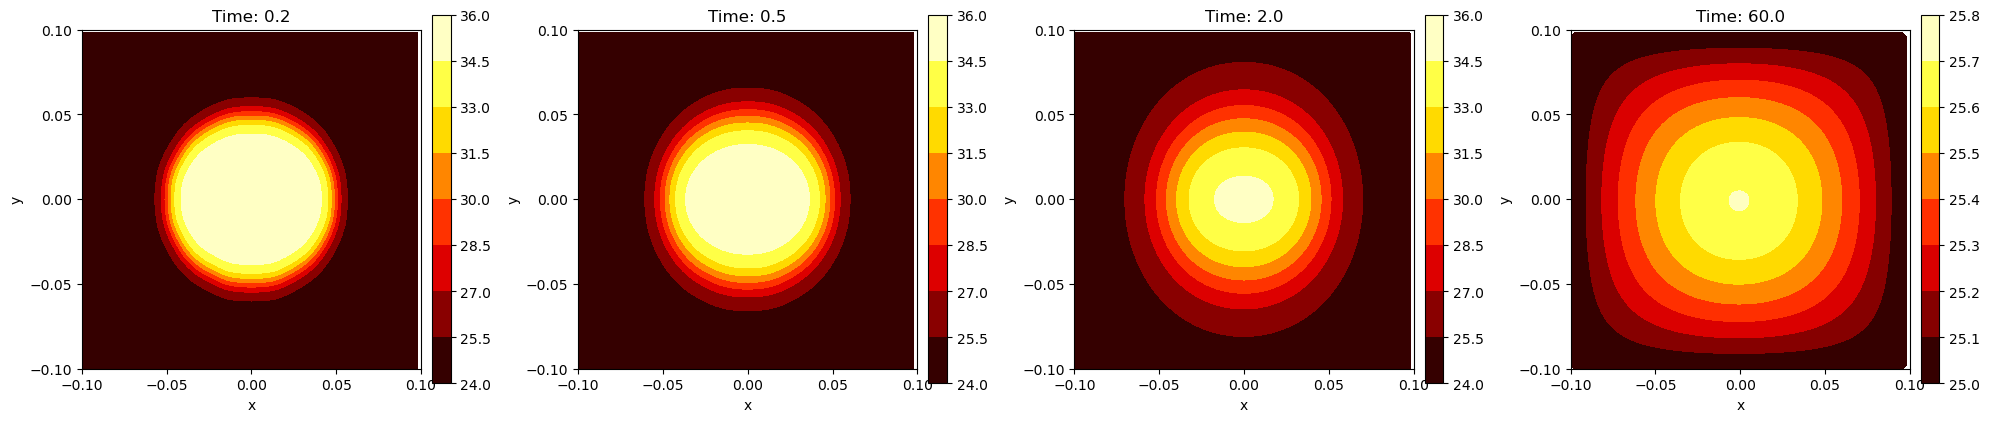

In [89]:
# Plotting the temperature distribution at different time intervals
time_intervals = [0.2, 0.5, 2, 60]  # Time intervals at which to plot the temperature
fig, axes = plt.subplots(1, len(time_intervals), figsize=(20, 5))

# Define the ticks to be consistent across x and y axes
ticks = np.arange(-0.1, 0.11, 0.05)

for idx, interval in enumerate(time_intervals):
    t_index = int(interval / dt)
    ax = axes[idx]
    contour = ax.contourf(X, Y, temperature_plots[t_index][1], cmap='hot')
    ax.set_title(f'Time: {interval:.1f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')  # Set aspect ratio to be equal
    # Set the same tick marks on x and y axes
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    # Adjust colorbar: smaller size using fraction and pad parameters
    colorbar = fig.colorbar(contour, ax=ax, fraction=0.05, pad=0.03)

plt.tight_layout()
plt.show()


thermophoresis

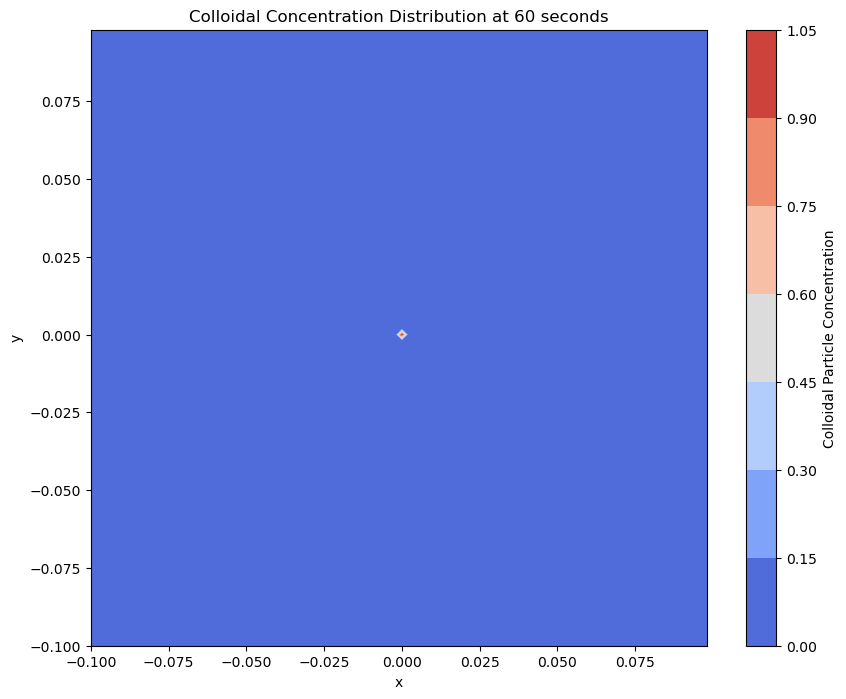

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
D = 1e-9  # diffusion coefficient of the colloid in the liquid crystal medium
Soret_coefficient = 1e-3  # Soret coefficient, characterizes the thermophoretic movement of the colloid
dt = 0.01  # time step
dx = 0.002  # spatial step
dy = dx  # spatial step
total_time = 60  # total simulation time in seconds (2 minutes)

# Import the final temperature distribution at 2 minutes from the previous simulation
# In your case, you would obtain the temperature distribution from the previous code's output
# For demonstration, we will simulate a similar temperature distribution to use here
# Use the code from the previous section and take the temperature at 2 minutes
temperature_distribution = temperature_plots[int(2 / dt)][1]

# Create a 2D grid for the colloidal particles
x = np.arange(-0.1, 0.1, dx)
y = np.arange(-0.1, 0.1, dy)
X, Y = np.meshgrid(x, y)

# Initialize the concentration of colloidal particles
C = np.full(X.shape, 0.0, dtype=np.float64)
# Add an initial concentration of colloidal particles near the heated bubble
C[int(X.shape[0] / 2), int(Y.shape[1] / 2)] = 1.0  # Initial concentration at the center

# Function to update the colloidal particle concentration using thermophoresis
def update_colloidal_concentration(C, T, D, Soret_coefficient, dt, dx, dy):
    C_new = np.copy(C)
    for i in range(1, C.shape[0] - 1):
        for j in range(1, C.shape[1] - 1):
            # Calculate the temperature gradient
            grad_x = (T[i + 1, j] - T[i - 1, j]) / (2 * dx)
            grad_y = (T[i, j + 1] - T[i, j - 1]) / (2 * dy)
            
            # Calculate the flux due to thermophoresis
            flux_x = -Soret_coefficient * grad_x * C[i, j]
            flux_y = -Soret_coefficient * grad_y * C[i, j]
            
            # Calculate the Laplacian for diffusion
            laplacian_x = (C[i + 1, j] - 2 * C[i, j] + C[i - 1, j]) / dx**2
            laplacian_y = (C[i, j + 1] - 2 * C[i, j] + C[i, j - 1]) / dy**2
            
            # Update the concentration
            C_new[i, j] += (D * (laplacian_x + laplacian_y) + flux_x + flux_y) * dt
    return C_new

# Time evolution of the colloidal particle concentration
times = np.arange(0, total_time, dt)
colloidal_concentration_plots = []

for t in times:
    C = update_colloidal_concentration(C, temperature_distribution, D, Soret_coefficient, dt, dx, dy)
    colloidal_concentration_plots.append((t, C))

# Plotting the distribution of colloidal particles at the end of the simulation
fig, ax = plt.subplots(figsize=(10, 8))

contour = ax.contourf(X, Y, colloidal_concentration_plots[-1][1], cmap='coolwarm')
ax.set_title(f'Colloidal Concentration Distribution at {total_time} seconds')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

# Add a colorbar for reference
colorbar = fig.colorbar(contour, ax=ax)
colorbar.set_label('Colloidal Particle Concentration')

plt.show()
